# 공공 보건의료기관 분석

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

In [262]:
from xml.dom.minidom import getDOMImplementation


DIR = '../Data/'
PUBLIC_HEALTH = '공공보건의료기관현황.csv'
GENDER_POPULATION = '행정구역시군구별_성별인구수.xlsx'

public_health = pd.read_csv(DIR + PUBLIC_HEALTH, encoding='euc_kr')
population = pd.read_excel(DIR+GENDER_POPULATION)

## 공공보건의료현황 데이터 전처리

파일 형식 확인

In [263]:
public_health.head()

,연번,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
0,1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
1,2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
2,3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
3,4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
4,5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


주소만 뽑아와서 데이터 전처리작업

In [264]:
addr = pd.DataFrame(public_health['주소'])
addr = addr['주소'].apply(lambda x: x.split()[:2])
addr = pd.DataFrame(addr.tolist(), columns=('시도', '군구'))

In [265]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

창원시 데이터 변경

In [266]:
addr[addr['시도'] == '창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [267]:
addr.iloc[27] = ['경상남도', '창원시']
addr.iloc[31] = ['경상남도', '창원시']

In [268]:
addr.iloc[27]

시도    경상남도
군구     창원시
Name: 27, dtype: object

경산, 천안시 데이터 변경

In [269]:
addr[addr['시도'] == '경산시']
addr.iloc[47] = ['경상북도', '경산시']
addr.iloc[47]

시도    경상북도
군구     경산시
Name: 47, dtype: object

In [270]:
addr[addr['시도'] == '천안시']
addr.iloc[209] = ['충정남도', '천안시']
addr.iloc[210] = ['충정남도', '천안시']
addr.iloc[209]

시도    충정남도
군구     천안시
Name: 209, dtype: object

시도 이름을 표준이름으로 변경

In [271]:
print(addr['시도'].unique())

['강원도' '경기도' '경기' '경남' '경상남도' '경상북도' '경북' '인천광역시' '대구광역시' '전라남도' '대전광역시'
 '광주광역시' '제주특별자치도' '부산광역시' '전라북도' '충북' '서울특별시' '서울시' '부산특별시' '대전시' '충남'
 '전남' '충청남도' '울산광역시' '전북' '충정남도' '충청북도']


In [272]:
addr_aliases = {
    "경기": "경기도",
    "경남": "경상남도",
    "경북": "경상북도",
    "충북": "충청북도",
    "서울시": "서울특별시",
    "부산특별시": "부산광역시",
    "대전시": "대전광역시",
    "충남": "충청남도",
    "전남": "전라남도",
    "전북": "전라북도",
}

addr['시도'] = addr['시도'].apply(lambda x: addr_aliases.get(x, x))

In [273]:
addr['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시', '충정남도'], dtype=object)

군구 데이터 변경

In [274]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [275]:
addr[addr['군구'] == '아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [276]:
addr.iloc[75] = ['제주특별자치도', '제주시']
addr.iloc[75]

시도    제주특별자치도
군구        제주시
Name: 75, dtype: object

시도군구 합친 새로운 컬럼 만들어줌

In [277]:
addr['시도군구'] = addr.apply(lambda x: x['시도'] + ' ' + x['군구'], axis=1)
addr.head()

,시도,군구,시도군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


count 컬럼 추가하기

In [278]:
addr['count'] = 0
addr.head()

,시도,군구,시도군구,count
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0


시도, 군구, 시도군구로 그룹화하고 카운트로 개수를 구함

In [279]:
addr_group = pd.DataFrame(addr.groupby(['시도', '군구', '시도군구'], as_index=False).count())
addr_group

,시도,군구,시도군구,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1
...,...,...,...,...
135,충청북도,영동군,충청북도 영동군,1
136,충청북도,제천시,충청북도 제천시,1
137,충청북도,청원군,충청북도 청원군,1
138,충청북도,청주시,충청북도 청주시,4


나중에 합치기 위해서 인덱스로 설정해줌

In [280]:
addr_group = addr_group.set_index('시도군구')
addr_group

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1
...,...,...,...
충청북도 영동군,충청북도,영동군,1
충청북도 제천시,충청북도,제천시,1
충청북도 청원군,충청북도,청원군,1


## 행정구역별 인구 데이터 전처리

In [281]:
population.head()

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684


컬럼명 변경

In [282]:
population = population.rename(columns={"행정구역(시군구)별(1)": "시도", "행정구역(시군구)별(2)": "군구"})
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684


값 공백 제거

In [283]:
# row_count = population.shape[0]  # row의 개수
# for element in range(0, row_count):
#     population['군구'][element] = population['군구'][element].strip()
# ----> 카피에러 발생
population['군구'] = population['군구'].apply(lambda x: x.strip())

In [284]:
population['시도군구'] = population.apply(lambda x: x['시도'] + ' ' + x['군구'], axis=1)

population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,소계,51847509,25862863,25984646,전국 소계
1,서울특별시,소계,9733509,4745088,4988421,서울특별시 소계
2,서울특별시,종로구,151215,73688,77527,서울특별시 종로구
3,서울특별시,중구,126201,61946,64255,서울특별시 중구
4,서울특별시,용산구,229385,110701,118684,서울특별시 용산구


소계 항목 제거, 시도군구를 인덱스로 설정

In [285]:
population = population[population.군구 != '소계']

In [286]:
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
2,서울특별시,종로구,151215,73688,77527,서울특별시 종로구
3,서울특별시,중구,126201,61946,64255,서울특별시 중구
4,서울특별시,용산구,229385,110701,118684,서울특별시 용산구
5,서울특별시,성동구,300410,147020,153390,서울특별시 성동구
6,서울특별시,광진구,351263,170164,181099,서울특별시 광진구


In [287]:
poplation = population.set_index('시도군구').copy()
poplation.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,151215,73688,77527
서울특별시 중구,서울특별시,중구,126201,61946,64255
서울특별시 용산구,서울특별시,용산구,229385,110701,118684
서울특별시 성동구,서울특별시,성동구,300410,147020,153390
서울특별시 광진구,서울특별시,광진구,351263,170164,181099


## 데이터프레임 병합
- 내부 조인(inner join)
  - 둘 이상의 데이터프레임에서 조건에 맞는 행을 연결 
- 외부 조인(outter join)
  - 한쪽 데이터프레임에만 존재하는 데이터를 다른 데이터프레임에 결합

In [288]:
addr_population_merge = pd.merge(
    addr_group, poplation, how="inner", left_index=True, right_index=True
)

addr_population_merge.head()

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,213328,105775,107553
강원도 동해시,강원도,동해시,1,강원도,동해시,90417,45782,44635
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,66806,33811,32995
강원도 속초시,강원도,속초시,1,강원도,속초시,81840,40470,41370
강원도 양구군,강원도,양구군,1,강원도,양구군,22526,11937,10589


필요한 컬럼만 추출해서 새로운 데이터프레임 생성

In [289]:
from threading import local


local_medicalcener_population = addr_population_merge[['시도_x', '군구_x', 'count', '총인구수 (명)']]
local_medicalcener_population.columns

Index(['시도_x', '군구_x', 'count', '총인구수 (명)'], dtype='object')

In [290]:
local_medicalcener_population = local_medicalcener_population.rename(
    columns={"시도_x": "시도", "군구_x": "군구", "count": "공공의료기관수", "총인구수 (명)": "인구수"}
)

In [291]:
local_medicalcener_population.head()

,시도,군구,공공의료기관수,인구수
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,213328
강원도 동해시,강원도,동해시,1,90417
강원도 삼척시,강원도,삼척시,1,66806
강원도 속초시,강원도,속초시,1,81840
강원도 양구군,강원도,양구군,1,22526


인구대비 의료기관 비율 컬럼 추가

In [292]:
mc_count = local_medicalcener_population['공공의료기관수']
local_population = local_medicalcener_population['인구수']

local_medicalcener_population['인구대비의료기관비율'] = mc_count.div(local_population, axis=0) * 100000
local_medicalcener_population.head()

,시도,군구,공공의료기관수,인구수,인구대비의료기관비율
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,213328,1.875047
강원도 동해시,강원도,동해시,1,90417,1.105987
강원도 삼척시,강원도,삼척시,1,66806,1.496872
강원도 속초시,강원도,속초시,1,81840,1.221896
강원도 양구군,강원도,양구군,1,22526,4.439315


지역별 공공의료기관수 현황 그래프

<Figure size 1200x800 with 0 Axes>

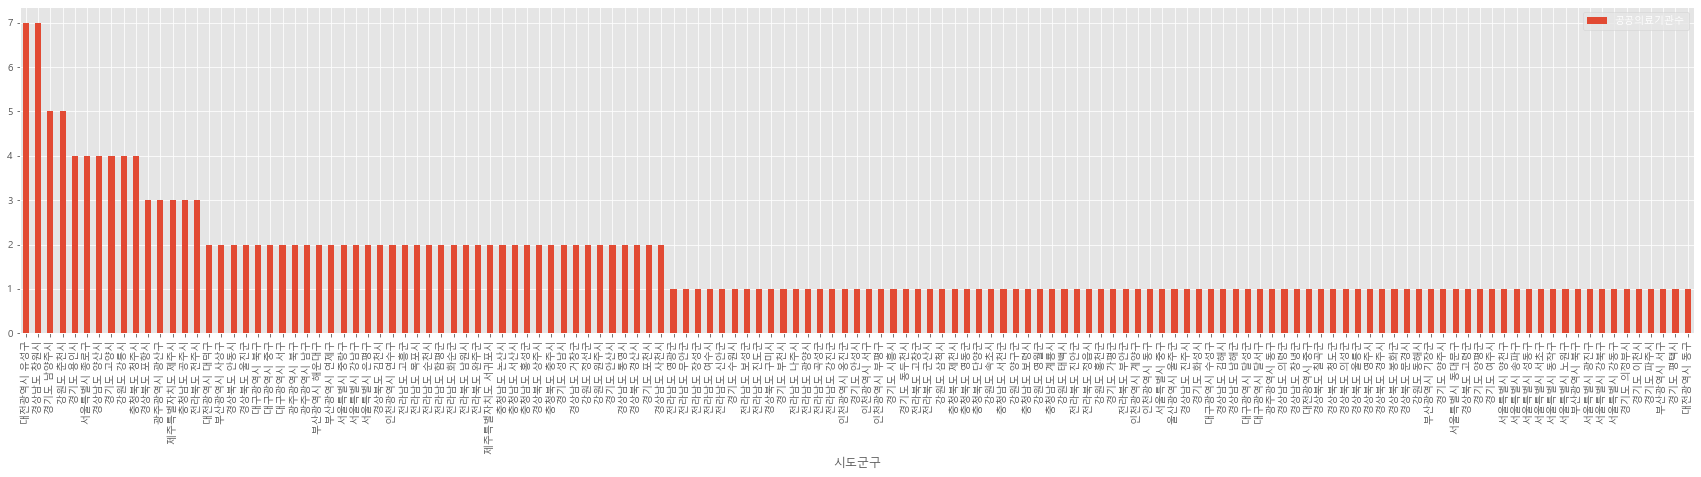

In [293]:
plt.style.use('ggplot')
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

mc_ratio = local_medicalcener_population[['공공의료기관수']]
mc_ratio = mc_ratio.sort_values('공공의료기관수', ascending=False)

plt.figure(dpi=200)
mc_ratio.plot(kind='bar', rot=90, figsize=(30, 6))
plt.show()

인구대비 공공의료기관 비율 그래프

<Figure size 1200x800 with 0 Axes>

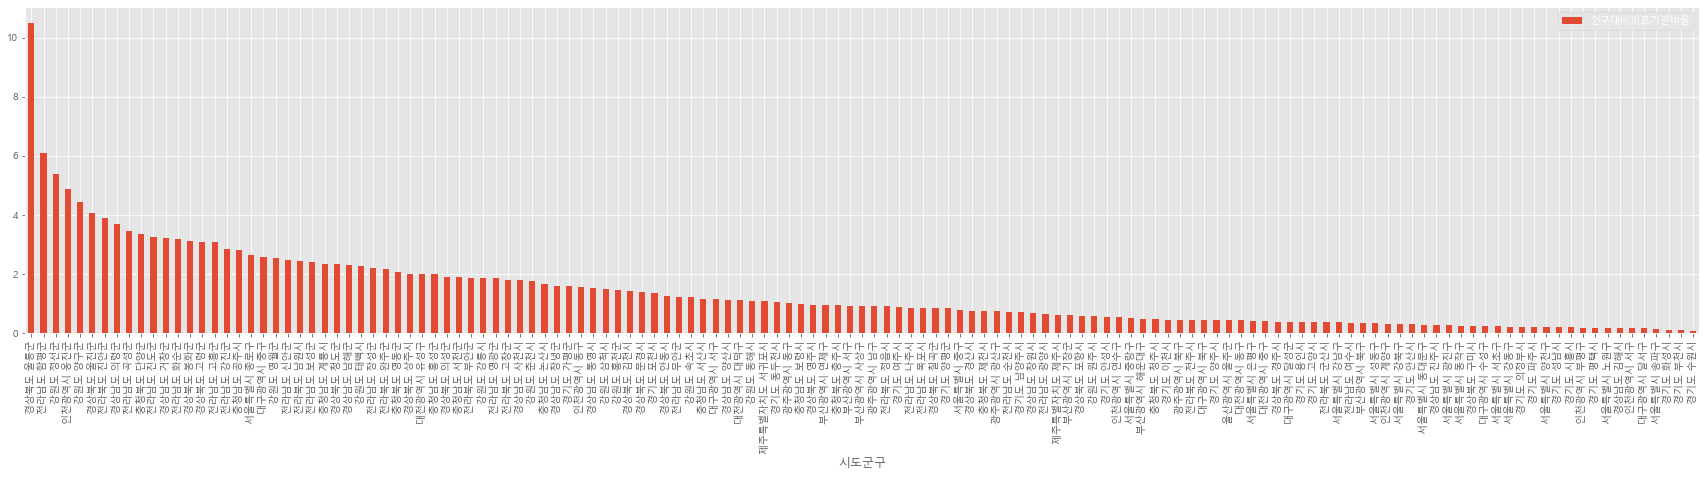

In [294]:
plt.style.use('ggplot')
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

population_mc_rate = local_medicalcener_population[['인구대비의료기관비율']]
population_mc_rate = population_mc_rate.sort_values('인구대비의료기관비율', ascending=False)

plt.figure(dpi=200)
population_mc_rate.plot(kind='bar', rot=90, figsize=(30,6))
plt.show()